In [4]:
# Essential packages
import pandas as pd
import numpy as np
import missingno as msno

# Plot packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Pre-processing packages
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# APIs for machine learning
from mlxtend.frequent_patterns import apriori,association_rules
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA

In [5]:
df=pd.read_csv('supermarket_marketing/Market_Basket_Optimisation.csv',header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
products = df.values.tolist()
name_col =['ID_client','item_description']
df_prod = pd.DataFrame(columns=name_col)
for i in range(len(products)):
    buy_list = set(products[i])
    for j in buy_list:
        n = len(df_prod.index)
        df_prod.loc[n,'ID_client'] = i
        df_prod.loc[n,'item_description'] = j

df_prod.dropna(inplace = True)

In [11]:
list_products = set()
for i in range(len(products)):
    list_products = set(products[i]) | list_products
    
list_products = list(list_products)
list_products.pop(0)
list_products.append('Count_products')
aa =np.zeros((len(products),len(list_products)))
df_prod2 = pd.DataFrame(aa, columns = list_products)

for i in range(len(products)-1):
    buy_list = set(products[i])
    for j in range(len(list_products)-1):
        for k in buy_list:
            if list_products[j] == k:
                df_prod2.iloc[i,j] = 1 + df_prod2.iloc[i,j]

    df_prod2.iloc[i,len(list_products)-1] = df_prod2.iloc[i,0:len(list_products)-2].sum()
    
pd.set_option('display.max_columns', None)
df_prod2.describe()

,salad,mushroom cream sauce,butter,cream,rice,asparagus,strong cheese,eggs,vegetables mix,carrots,nonfat milk,escalope,yams,muffins,fresh tuna,gluten free bar,magazines,light mayo,clothes accessories,melons,mashed potato,shallot,whole wheat rice,green tea,pickles,white wine,toothpaste,napkins,hot dogs,cauliflower,shampoo,grated cheese,turkey,french fries,olive oil,barbecue sauce,tomato sauce,ham,cooking oil,parmesan cheese,french wine,burger sauce,tomato juice,avocado,antioxydant juice,fresh bread,shrimp,chutney,body spray,sandwich,mint green tea,herb & pepper,chocolate,honey,almonds,tea,spinach,green beans,frozen smoothie,salt,eggplant,asparagus,cookies,mint,energy drink,ketchup,babies food,green grapes,ground beef,milk,extra dark chocolate,energy bar,oil,cottage cheese,cereals,tomatoes,whole weat flour,mayonnaise,soda,zucchini,bramble,pasta,dessert wine,strawberries,corn,protein bar,chocolate bread,meatballs,light cream,red wine,brownies,mineral water,pet food,spaghetti,sparkling water,hand protein bar,soup,yogurt cake,burgers,low fat yogurt,champagne,gums,water spray,chili,cider,NaN,pancakes,whole wheat pasta,candy bars,frozen vegetables,oatmeal,bug spray,salmon,pepper,flax seed,black tea,blueberries,cake,bacon,fromage blanc,Count_products
count,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.00000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.0,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000
mean,0.004933,0.019064,0.030129,0.000933,0.018797,0.004666,0.007732,0.179576,0.025730,0.015331,0.010399,0.079323,0.011465,0.024130,0.022264,0.006932,0.010932,0.027196,0.008399,0.011998,0.004133,0.007732,0.058526,0.132116,0.005999,0.016531,0.008132,0.000667,0.032396,0.004799,0.004933,0.052393,0.062525,0.170911,0.065858,0.010799,0.014131,0.026530,0.051060,0.019864,0.02253,0.005866,0.030396,0.033329,0.008932,0.043061,0.071457,0.004133,0.011465,0.004533,0.005599,0.049460,0.163845,0.047460,0.020397,0.003866,0.007066,0.008666,0.063192,0.009199,0.013198,0.000133,0.080389,0.017464,0.026663,0.004399,0.004533,0.009065,0.098254,0.129583,0.011998,0.027063,0.023064,0.031862,0.025730,0.068391,0.009332,0.006133,0.006266,0.009465,0.001866,0.015731,0.004399,0.021330,0.004799,0.018531,0.004266,0.020931,0.015598,0.028130,0.033729,0.238368,0.006532,0.174110,0.006266,0.005199,0.050527,0.027196,0.087188,0.076390,0.046794,0.013465,0.000400,0.006133,0.010532,0.0,0.095054,0.029463,0.009732,0.095321,0.004399,0.008666,0.042528,0.026530,0.009065,0.014265,0.009199,0.081056,0.008666,0.013598,3.839755
std,0.070064,0.136760,0.170954,0.030536,0.135818,0.068153,0.087599,0.383860,0.158339,0.122875,0.101449,0.270260,0.106467,0.153463,0.147550,0.082978,0.103989,0.162666,0.091266,0.108885,0.064158,0.08

Analyzing the table we have:

There is no repetition of the same item in a single purchase.
On average a consumer buys 4 products.
The highest number of products purchased in a single time was 20.

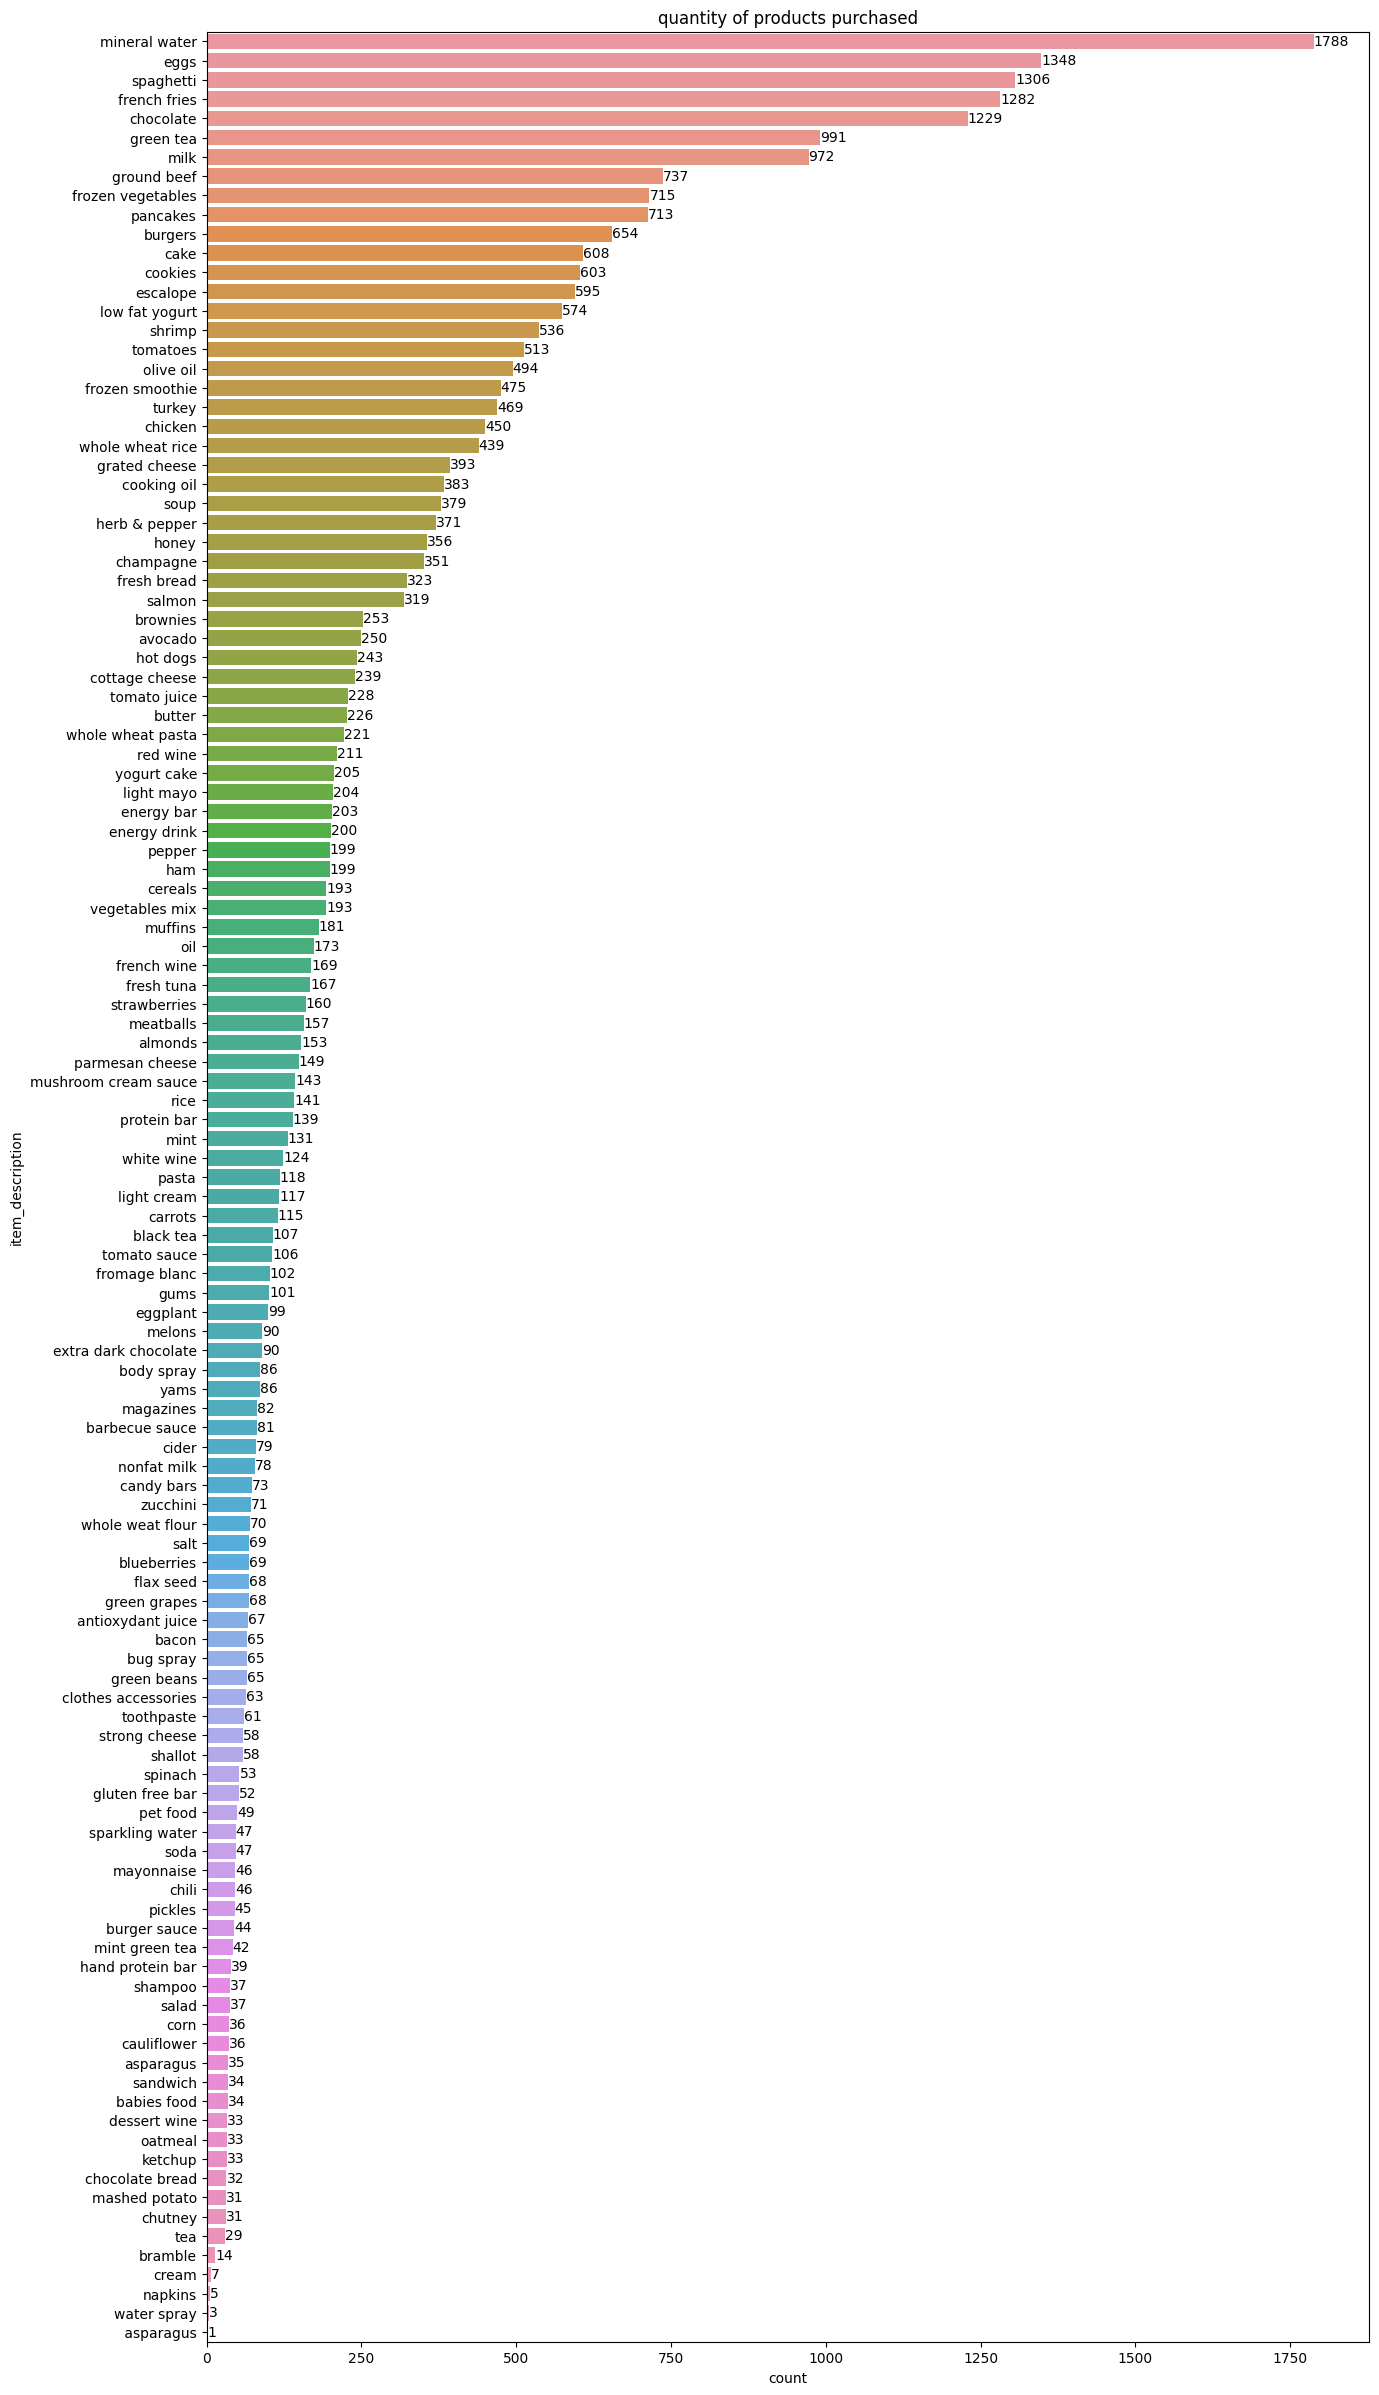

In [12]:
plt.figure(figsize=(15,30))
ax = sns.countplot(data= df_prod, y= 'item_description',order = df_prod['item_description'].value_counts().index)
ax.bar_label(ax.containers[0])
ax.set_title("quantity of products purchased")
plt.show()

Based on the chart the top 10 most purchased items are:

mineral water, eggs, spaghetti, french fries, chocolate, green tea, milk, ground beef, frozen vegetables, pancakes.
Of these items, most are made up of daily consumption items and breakfast items.

The top 10 least purchased items are:

asparagus, water spray, napkins, cream, bramble, tea, mashed potato, chutney, chocolate bread, dessert wine.
Some of these items are considered cleaning, dessert and vegetable items, but there does not seem to be a visible pattern among them for low demand.

To identify the most purchased product pairs, association rules will be used.

# Association

To understand association rules, it is necessary to understand four fundamental concepts:

Support: Support is an indication of how frequently the itemset appears in the dataset. In other words, this is an indication of how popular an itemset is in a dataset.

Confidence: Confidence is an indication of how often the rule has been found to be true. In other words, confidence says how likely item Y is purchased when item X is purchased.

Lift: Lift is a metric to measure the ratio of X and Y occur together to X and Y occurrence if they were statistically independent. In other words, lift illustrates how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is.

A Lift score that is close to 1 indicates that the antecedent and the consequent are independent and occurrence of antecedent has no impact on occurrence of consequent.

A Lift score that is bigger than 1 indicates that the antecedent and consequent are dependent to each other, and the occurrence of antecedent has a positive impact on occurrence of consequent.

A Lift score that is smaller than 1 indicates that the antecedent and the consequent are substitute each other that means the existence of antecedent has a negative impact to consequent or visa versa.

Conviction: Conviction measures the implication strength of the rule from statistical independence Conviction score is a ratio between the probability that X occurs without Y while they were dependent and the actual probability of X existence without Y.

In [13]:
df_prod2.drop(columns = ['Count_products'],inplace = True)
freq_item = apriori(df_prod2, min_support=0.01, use_colnames=True)
freq_item['length'] = freq_item['itemsets'].apply(lambda x: len(x))
freq_item

,support,itemsets,length
0,0.019064,(mushroom cream sauce),1
1,0.030129,(butter),1
2,0.018797,(rice),1
3,0.179576,(eggs),1
4,0.025730,(vegetables mix),1
...,...,...,...
244,0.017064,"(ground beef, spaghetti, mineral water)",3
245,0.015731,"(milk, spaghetti, mineral water)",3
246,0.011065,"(frozen vegetables, milk, mineral water)",3
247,0.011465,"(spaghetti, pancakes, mineral water)",3


DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type

In [14]:
freq_item[ (freq_item['length'] == 2) & (freq_item['support'] >= 0.04) ]

,support,itemsets,length
89,0.050927,"(eggs, mineral water)",2
173,0.052660,"(chocolate, mineral water)",2
190,0.040928,"(ground beef, mineral water)",2
196,0.047994,"(milk, mineral water)",2
210,0.059725,"(spaghetti, mineral water)",2


Based on the minimum support value chosen of 1%, we have that at most the formation of a group consisting of 3 items occurs.

In [15]:
freq_item[ (freq_item['length'] == 3) ]

,support,itemsets,length
232,0.013465,"(eggs, chocolate, mineral water)",3
233,0.010532,"(eggs, spaghetti, chocolate)",3
234,0.010132,"(ground beef, eggs, mineral water)",3
235,0.013065,"(milk, eggs, mineral water)",3
236,0.014265,"(eggs, spaghetti, mineral water)",3
237,0.010132,"(spaghetti, french fries, mineral water)",3
238,0.010265,"(olive oil, spaghetti, mineral water)",3
239,0.010932,"(ground beef, chocolate, mineral water)",3
240,0.013998,"(milk, chocolate, mineral water)",3
241,0.010932,"(milk, spaghetti, chocolate)",3


Observing the pairs of items generated with a support value greater than 4%, in all cases there is the presence of the item 'mineral water'.

It is also noticeable that all these pairs are generated with the top 10 items purchased from this supermarket.

In [16]:
rules = association_rules(freq_item, metric="lift", min_threshold=1.3)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("confidence",ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
206,"(ground beef, eggs)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,2,1
258,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,2,1
234,"(ground beef, chocolate)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,2,1
276,"(frozen vegetables, milk)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136,2,1
163,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,1,1
282,"(spaghetti, pancakes)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557,2,1
228,"(olive oil, spaghetti)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,0.004799,1.378954,2,1
270,"(milk, spaghetti)",(mineral water),0.035462,0.238368,0.015731,0.443609,1.861024,0.007278,1.368879,2,1
240,"(milk, chocolate)",(mineral water),0.032129,0.238368,0.013998,0.435685,1.827780,0.006340,1.349656,2,1
264,"(ground beef, spaghetti)",(mineral water),0.039195,0.238368,0.017064,0.435374,1.826477,0.007722,1.348914,2,1


Observing the generated table, the presence of the item 'mineral water' is again noted in almost all the groups formed.

Looking at the table, it is possible to notice that there is a great tendency for the item 'mineral water' to be the third item to be purchased.

In the table we see a large presence of the items 'ground beef', 'spaghetti' and 'milk' as antecedents that have a higher confidence value, but for the most part they are bought in pairs to later result in the purchase of 'mineral water'. In general, all these hypotheses have high lift and conviction values, reinforcing the reliability of this rule.

In [17]:
px.scatter(rules, x ='support', y =  'lift', color = 'confidence')

Looking at the graph, most of the rules created have a lift greater than 1 and a confidence value less than 50%. This gives us the idea that the rules created have a lot of strength but that some do not have a strong occurrence in the shopping lists examined.

In [20]:
rules[ (rules['antecedents_length'] == 1) ].sort_values("confidence",ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
163,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,1,1
52,(olive oil),(mineral water),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962,1,1
122,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,1,1
170,(salmon),(mineral water),0.042528,0.238368,0.017064,0.401254,1.683336,0.006927,1.272045,1,1
149,(cereals),(mineral water),0.025730,0.238368,0.010265,0.398964,1.673729,0.004132,1.267198,1,1
124,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,1,1
64,(cooking oil),(mineral water),0.051060,0.238368,0.020131,0.394256,1.653978,0.007960,1.257349,1,1
156,(red wine),(mineral water),0.028130,0.238368,0.010932,0.388626,1.630358,0.004227,1.245770,1,1
168,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270,1,1
134,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,1,1


Looking at the table that takes into account the purchase of only 1 item as a predecessor, we can see the strong presence of the item 'mineral water' again.

Another product that deviates a bit from this rule is the item 'ground beef' with 'spaghetti' having a confidence value of around 40% together with a very high lift of 2.3.

In [19]:
rules[ (rules['antecedents_length'] == 1) & (rules['consequents_length'] == 1) ].sort_values("confidence",ascending=True).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
148,(mineral water),(cereals),0.238368,0.025730,0.010265,0.043065,1.673729,0.004132,1.018115,1,1
157,(mineral water),(red wine),0.238368,0.028130,0.010932,0.045861,1.630358,0.004227,1.018584,1,1
69,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113,1,1
158,(spaghetti),(red wine),0.174110,0.028130,0.010265,0.058959,2.095966,0.005368,1.032761,1,1
109,(mineral water),(honey),0.238368,0.047460,0.015065,0.063199,1.331619,0.003752,1.016801,1,1
106,(chocolate),(salmon),0.163845,0.042528,0.010665,0.065094,1.530617,0.003697,1.024137,1,1
110,(spaghetti),(honey),0.174110,0.047460,0.011865,0.068147,1.435873,0.003602,1.022200,1,1
2,(eggs),(herb & pepper),0.179576,0.049460,0.012532,0.069785,1.410930,0.003650,1.021849,1,1
103,(chocolate),(champagne),0.163845,0.046794,0.011598,0.070789,1.512793,0.003932,1.025824,1,1
171,(mineral water),(salmon),0.238368,0.042528,0.017064,0.071588,1.683336,0.006927,1.031302,1,1


Observing the rules that only have a predecessor item and a consequence item with the lowest confidence value, when a person buys 'mineral water' he has a low chance of buying items like 'cereals', 'red wine' together. and 'avocado'.

It is also noted that these rules presented relate items of greater demand as predecessor items and items of medium demand as a consequence.